In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [64]:
tf.__version__

'2.5.0'

# Part 1: Data Pre processing

# Importing the dataset

In [65]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [66]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [67]:
print(y)

[1 0 1 ... 1 1 0]


In [68]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Encoding Categorical Data

# Label encoding the "Gender" column

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [70]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


# One hot encoding the "Geography" column

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [72]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Splitting the dataset into the Training and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [75]:
print(X_train[0])

[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]


# Part 2 - Building the ANN

# Initializing the ANN

In [76]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

In [77]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer

In [78]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer

In [79]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN

In [80]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set

In [81]:
#train on 100,500,1000 epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
250/250 [==============================] - 1s 1ms/step - loss: 0.7325 - accuracy: 0.5529
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7935
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8058
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8317
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8365
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8401
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8428
Epoch 8/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8475
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8480
Epoch 10/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.364

250/250 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8627
Epoch 81/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8645
Epoch 82/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8631
Epoch 83/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8627
Epoch 84/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8637
Epoch 85/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8637
Epoch 86/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8627
Epoch 87/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8633
Epoch 88/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8612
Epoch 89/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - a

250/250 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8621
Epoch 160/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8640
Epoch 161/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8648
Epoch 162/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8631
Epoch 163/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8649
Epoch 164/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8633
Epoch 165/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8635
Epoch 166/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8648
Epoch 167/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8625
Epoch 168/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8643
Epoch 238/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8651
Epoch 239/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8635
Epoch 240/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8643
Epoch 241/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8634
Epoch 242/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8643
Epoch 243/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8625
Epoch 244/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8633
Epoch 245/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8650
Epoch 246/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8636
Epoch 316/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8643
Epoch 317/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8637
Epoch 318/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8636
Epoch 319/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8636
Epoch 320/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8643
Epoch 321/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8644
Epoch 322/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8643
Epoch 323/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8641
Epoch 324/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8637
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8640
Epoch 395/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8639
Epoch 396/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8646
Epoch 397/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8645
Epoch 398/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8637
Epoch 399/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8629
Epoch 400/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8636
Epoch 401/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8634
Epoch 402/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8625
Epoch 472/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8652
Epoch 473/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8639
Epoch 474/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8648
Epoch 475/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8643
Epoch 476/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8645
Epoch 477/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8644
Epoch 478/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8643
Epoch 479/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8639
Epoch 480/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8636
Epoch 550/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8646
Epoch 551/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8639
Epoch 552/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8649
Epoch 553/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8643
Epoch 554/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8627
Epoch 555/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8646
Epoch 556/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8648
Epoch 557/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8639
Epoch 558/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8648
Epoch 628/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8649
Epoch 629/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8625
Epoch 630/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8641
Epoch 631/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8629
Epoch 632/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8646
Epoch 633/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8646
Epoch 634/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8624
Epoch 635/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8641
Epoch 636/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8627
Epoch 706/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8640
Epoch 707/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8645
Epoch 708/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8651
Epoch 709/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8648
Epoch 710/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8635
Epoch 711/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8645
Epoch 712/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8652
Epoch 713/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8655
Epoch 714/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8648
Epoch 784/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8648
Epoch 785/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8660
Epoch 786/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8637
Epoch 787/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8631
Epoch 788/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8648
Epoch 789/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8641
Epoch 790/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8656
Epoch 791/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8649
Epoch 792/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8649
Epoch 862/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8656
Epoch 863/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8652
Epoch 864/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8651
Epoch 865/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8658
Epoch 866/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8655
Epoch 867/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8641
Epoch 868/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8648
Epoch 869/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8651
Epoch 870/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8645
Epoch 940/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8648
Epoch 941/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8630
Epoch 942/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8644
Epoch 943/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8665
Epoch 944/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8637
Epoch 945/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8639
Epoch 946/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8649
Epoch 947/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8637
Epoch 948/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

# Part 4 - Making the predictions and evaluating the model
Predicting the result of 3 observation
Therefore, our ANN model predicts that this customer stays in the bank!

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.For Male you should encode as '1' and for Female '0'

Assignment

Use our ANN model to predict if the customers with the following informations will leave the bank:

Geography: France,Germany,Spain

Credit Score: 600,800,700

Gender: Male,Female,Male

Age: 40,50,35,years old

Tenure: 3,5,4 years

Balance: $ 60000,70000,0

Number of Products: 2,1,0

Does this customer have a credit card ? Yes,No,No

Is this customer an Active Member: Yes,No,No

Estimated Salary: $ 50000,10000,0

So, should we say goodbye to that customer ?

Sample If value is greater than 0.5 - True
Else -False

In [82]:
s=ann.predict(sc.transform([[1.0, 0.0, 0.0, 600, 1, 40, 3, 60000.0, 2, 1, 1, 50000]]))

In [83]:
if s>0.5:
    print(s,"True")
else:
    print(s,"False")

[[0.025958]] False


In [84]:
d=ann.predict(sc.transform([[0.0, 1.0, 0.0, 800, 0, 50, 5, 70000.0, 1, 0, 0, 10000]]))

In [85]:
if d>0.5:
    print(d,"True")
else:
    print(d,"False")

[[0.9330871]] True


In [86]:
e=ann.predict(sc.transform([[0.0, 0.0, 1.0, 700, 1, 35, 4, 0.0, 0, 0, 0, 0]]))

In [87]:
if e>0.5:
    print(e,"True")
else:
    print(e,"False")

[[0.99047744]] True


# Predicting the Test set results

In [88]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [89]:
y_pred[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [90]:
len(y_test)

2000

# Making the Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1517   78]
 [ 189  216]]


In [92]:
accuracy_score(y_test, y_pred)

0.8665

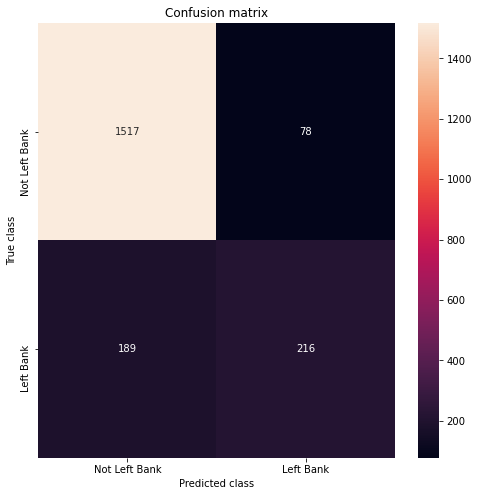

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Not Left Bank', 'Left Bank'] 
plt.figure(figsize =(8, 8)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()